In [39]:
import pandas as pd
import yfinance as yf

# Set the start and end dates for the data
start_date = '2012-01-01'
end_date = '2022-01-01'


# Use the DataReader function to import the data from Yahoo Finance
bitcoin_prices = yf.download('BTC-USD', start_date,period='5d')['Close']
gold_prices = yf.download('GC=F', start_date,period='5d')['Close']

# Display the first few rows of the data
print(bitcoin_prices.head())
print(gold_prices.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Close, dtype: float64
Date
2012-01-03    1599.699951
2012-01-04    1611.900024
2012-01-05    1619.400024
2012-01-06    1616.099976
2012-01-09    1607.500000
Name: Close, dtype: float64


In [40]:
bitcoin_log_returns = bitcoin_prices.pct_change()
gold_log_returns = gold_prices.pct_change()
bitcoin_log_returns = bitcoin_log_returns.rename('BTC')
gold_log_returns = gold_log_returns.rename('GOLD')
bitcoin_prices = bitcoin_prices.rename('BTCPRICE')
gold_prices = gold_prices.rename('GOLDPRICE')
logret = pd.concat([bitcoin_log_returns,gold_log_returns,bitcoin_prices,gold_prices],axis=1).dropna()

In [41]:
logret['corr'] = logret['BTC'].rolling(window=30).corr(other=logret['GOLD'])

In [42]:
logret = logret.dropna()

In [43]:
logret

,BTC,GOLD,BTCPRICE,GOLDPRICE,corr
Date,,,,,
2014-10-29,-0.061594,-0.003986,335.591003,1224.300049,0.561434
2014-10-30,0.028946,-0.021400,345.304993,1198.099976,0.378961
2014-10-31,-0.020226,-0.022536,338.321014,1171.099976,0.353252
2014-11-03,0.005100,-0.001452,327.553986,1169.400024,0.351159
2014-11-04,0.008970,-0.001710,330.492004,1167.400024,0.346256
...,...,...,...,...,...
2022-12-12,0.005978,-0.009788,17206.437500,1780.500000,0.134825
2022-12-13,0.033411,0.018759,17781.318359,1813.900024,0.166390
2022-12-14,0.001931,-0.003528,17815.650391,1807.500000,0.163880


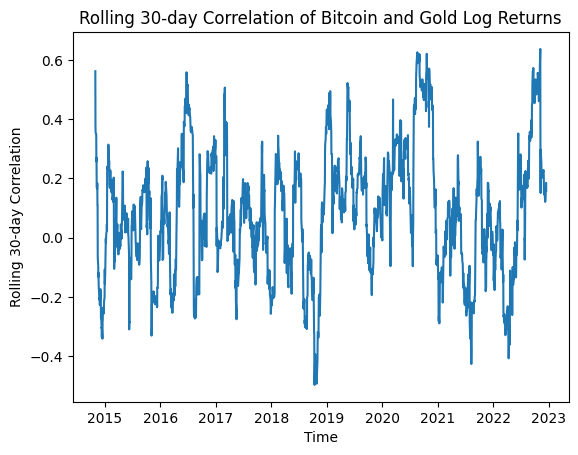

In [44]:
import matplotlib.pyplot as plt

plt.plot(logret['corr'])
plt.xlabel('Time')
plt.ylabel('Rolling 30-day Correlation')
plt.title('Rolling 30-day Correlation of Bitcoin and Gold Log Returns')
plt.show()

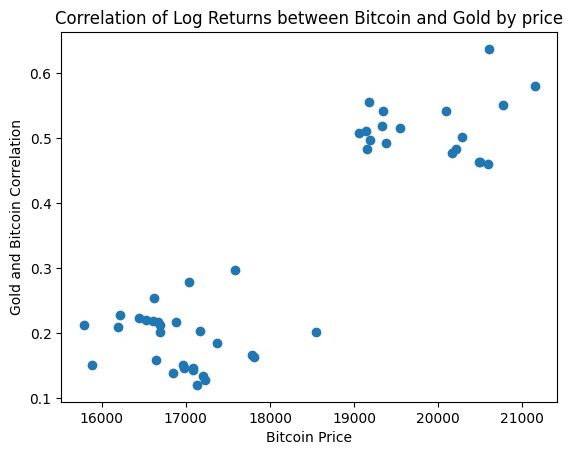

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y=logret['corr'][2000:], x=logret['BTCPRICE'][2000:])
plt.xlabel('Bitcoin Price')
plt.ylabel('Gold and Bitcoin Correlation')
plt.title('Correlation of Log Returns between Bitcoin and Gold by price')
plt.show()